In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 108.1 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [ ]:
data = pd.read_csv("balancedtask1reddit.csv")
data = data.drop(["Unnamed: 0.1", "Unnamed: 0"], axis = 1)
data = data.dropna()

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokens1 = []
for text in data["chat1"]:
  tokens1.append(tokenizer.tokenize(text))

tokens2 = []
for text in data["chat2"]:
  tokens2.append(tokenizer.tokenize(text))

In [ ]:
token_ids1 = []
for token in tokens1:
  token_ids1.append(tokenizer.convert_tokens_to_ids(token))

token_ids2 = []
for token in tokens2:
  token_ids2.append(tokenizer.convert_tokens_to_ids(token))

In [ ]:
maxlen = 100
padded_sequences1 = pad_sequences(token_ids1, maxlen=maxlen)

maxlen = 100
padded_sequences2 = pad_sequences(token_ids2, maxlen=maxlen)

In [ ]:
labels = pd.get_dummies(data["label"]).values

In [ ]:
padd = np.concatenate([padded_sequences1, padded_sequences2], axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(2 * (tokenizer.vocab_size + 1), 128, input_length=2*(maxlen)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [ ]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 15s 355ms/step - loss: 0.6986 - accuracy: 0.5053 - val_loss: 0.6926 - val_accuracy: 0.5053
Epoch 2/10
12/12 [==============================] - 2s 186ms/step - loss: 0.6788 - accuracy: 0.6974 - val_loss: 0.6900 - val_accuracy: 0.5474
Epoch 3/10
12/12 [==============================] - 3s 235ms/step - loss: 0.5745 - accuracy: 0.8553 - val_loss: 0.6385 - val_accuracy: 0.5895
Epoch 4/10
12/12 [==============================] - 3s 206ms/step - loss: 0.2461 - accuracy: 0.9263 - val_loss: 0.7372 - val_accuracy: 0.6421
Epoch 5/10
12/12 [==============================] - 3s 212ms/step - loss: 0.0538 - accuracy: 0.9895 - val_loss: 0.9226 - val_accuracy: 0.6632
Epoch 6/10
12/12 [==============================] - 2s 188ms/step - loss: 0.0176 - accuracy: 0.9974 - val_loss: 0.9477 - val_accuracy: 0.6526
Epoch 7/10
12/12 [==============================] - 3s 231ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.9890 - val_accuracy: 0.6526
Epoch

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

4/4 [==============================] - 1s 18ms/step


In [ ]:
y_test = np.argmax(y_test, axis=1)

In [ ]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.63        58
           1       0.65      0.54      0.59        61

    accuracy                           0.61       119
   macro avg       0.62      0.62      0.61       119
weighted avg       0.62      0.61      0.61       119

[[40 18]
 [28 33]]


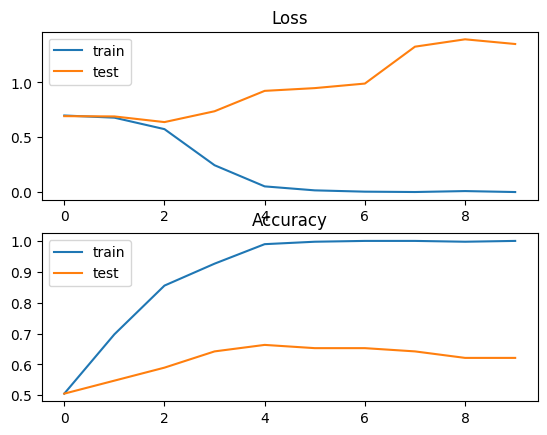

In [ ]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()